# 1.提出问题

## Q1.在AwardsSharePlayers.csv中，所有获得MVP奖的球员，在第一次获得年度MVP前，他们在棒球生涯中打的什么位置？年度MVP外野与非MVP外野球员表现上是否有较大差异？

# 2.数据清理

## Q1:
### 1.读取Appearances.csv 和 AwardsSharePlayers.csv并修正数据类型

In [190]:
#-*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns

filename_ape='baseballdatabank-2017.1\core\Appearances.csv'
filename_awd='baseballdatabank-2017.1\core\AwardsSharePlayers.csv'

appearances_df=pd.read_csv(filename_ape)
awards_df=pd.read_csv(filename_awd)
appearances_df.iloc[102760]

yearID           2016
teamID            SEA
lgID               AL
playerID     zychto01
G_all              12
GS                  0
G_batting           0
G_defense          12
G_p                12
G_c                 0
G_1b                0
G_2b                0
G_3b                0
G_ss                0
G_lf                0
G_cf                0
G_rf                0
G_of                0
G_dh                0
G_ph                0
G_pr                0
Name: 102760, dtype: object

In [191]:
awards_df.head()

,awardID,yearID,lgID,playerID,pointsWon,pointsMax,votesFirst
0,Cy Young,1956,ML,fordwh01,1.0,16,1.0
1,Cy Young,1956,ML,maglisa01,4.0,16,4.0
2,Cy Young,1956,ML,newcodo01,10.0,16,10.0
3,Cy Young,1956,ML,spahnwa01,1.0,16,1.0
4,Cy Young,1957,ML,donovdi01,1.0,16,1.0


### 2.在awards_df中选取出球员第一次获得MVP时的数据

In [192]:
MVPs_df=awards_df.groupby('awardID').get_group('MVP')
#因为csv中数据按年份排序，所以此处first()返回的就是组内最早一年的数据行
MVP_player_first_df=MVPs_df.groupby('playerID').first()
MVP_player_first_df.head()

,awardID,yearID,lgID,pointsWon,pointsMax,votesFirst
playerID,,,,,,
aaronha01,MVP,1955,NL,36.0,336,0.0
abernte02,MVP,1967,NL,8.0,280,0.0
abramca01,MVP,1954,AL,1.0,336,0.0
abreubo01,MVP,1999,NL,6.0,448,0.0
abreujo02,MVP,2014,AL,145.0,420,0.0


### 3.在appearances_df中找出MVP_player_first_df中球员在获得MVP前的表现记录

*在MVP_player_first_df中提取出playerID,lgID和yearID*

In [193]:
MVP_player_year_df=MVP_player_first_df.loc[:,['yearID','lgID']]
names=MVP_player_year_df.index
names

Index([u'aaronha01', u'abernte02', u'abramca01', u'abreubo01', u'abreujo02',
       u'adairje01', u'adamsac01', u'adamsba01', u'adamsbo03', u'adamsbu01',
       ...
       u'yuhased01', u'zachato01', u'zambrca01', u'zarilal01', u'zernigu01',
       u'zimmehe01', u'zimmery01', u'ziskri01', u'zitoba01', u'zobribe01'],
      dtype='object', name=u'playerID', length=1905)

在appearances_df中提取出MVP球员

In [194]:
MVP_player_appearances_df=appearances_df[(appearances_df.playerID.isin(names))]
def myfilter(g):
    global MVP_player_year_df
    pID=g.playerID[g.playerID.first_valid_index()]
    year=MVP_player_year_df.loc[pID,'yearID']
    team=MVP_player_year_df.loc[pID,'lgID']
    boolList=(g['yearID']<=year)
    #boolList2=(g['lgID']==team)
    #tf=boolList & boolList2
    return g[boolList]
MVP_player_appearances_bef_df=MVP_player_appearances_df.groupby('playerID').apply(myfilter)
MVP_player_appearances_bef_df.head()

yearID teamID lgID   playerID  G_all     GS  G_batting  \
playerID                                                                  
aaronha01 36841    1954    ML1   NL  aaronha01    122  113.0        122   
          37417    1955    ML1   NL  aaronha01    153  151.0        153   
abernte02 37419    1955    WS1   AL  abernte02     40   14.0         40   
          38074    1956    WS1   AL  abernte02      5    4.0          5   
          38696    1957    WS1   AL  abernte02     26   16.0         26   

                 G_defense  G_p  G_c  ...   G_2b  G_3b  G_ss  G_lf  G_cf  \
playerID                              ...                                  
aaronha01 36841        116    0    0  ...      0     0     0   105     0   
          37417        151    0    0  ...     27     0     0    30     0   
abernte02 37419         40   40    0  ...      0     0     0     0     0   
          38074          5    5    0  ...      0     0     0     0     0   
          38696         26   26    0  ...      0     0     0     0     0   

                 G_rf  G_of  G_dh  G_ph  G_pr  
playerID                                       
aaronha01 36841    11   116   0.0   7.0   1.0  
          37417   104   126   0.0   2.0   0.0  
abernte02 37419     0     0   0.0   0.0   0.0  
          38074     0     0   0.0   0.0   0.0  
          38696     0     0   0.0   0.0   0.0  

[5 rows x 21 columns]

*统计各个MVP球员在不同位置的上场次数*

In [195]:
MVP_count_df=MVP_player_appearances_bef_df.groupby(level=0).agg({'G_all':'sum','GS':'sum','G_batting':'sum','G_defense':'sum','G_p':'sum','G_c':'sum','G_1b':'sum','G_2b':'sum','G_3b':'sum','G_ss':'sum','G_lf':'sum','G_cf':'sum','G_rf':'sum','G_of':'sum','G_dh':'sum','G_ph':'sum','G_pr':'sum'})
MVP_count_df.head()

,G_3b,G_2b,GS,G_ph,G_rf,G_batting,G_1b,G_p,G_ss,G_of,G_lf,G_cf,G_defense,G_all,G_dh,G_pr,G_c
playerID,,,,,,,,,,,,,,,,,
aaronha01,0,27,264.0,9.0,115,275,0,0,0,242,135,0,267,275,0.0,1.0,0
abernte02,0,0,34.0,0.0,0,381,0,381,0,0,0,0,381,381,0.0,0.0,0
abramca01,0,0,313.0,112.0,224,445,0,0,0,342,81,42,342,445,0.0,5.0,0
abreubo01,0,0,339.0,31.0,336,377,0,0,0,352,16,1,352,377,5.0,1.0,0
abreujo02,0,0,144.0,1.0,0,145,109,0,0,0,0,0,109,145,35.0,0.0,0


In [196]:
#MVP_count_df[MVP_count_df['G_lf']!=0][MVP_count_df[MVP_count_df['G_lf']!=0]['G_of']==0]

*选择G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of共10列数据,累计每列和*

Populating the interactive namespace from numpy and matplotlib


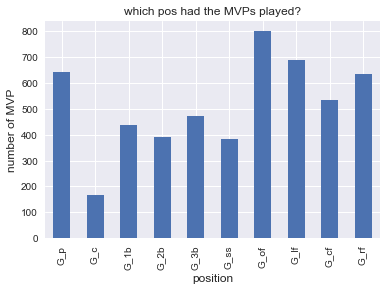

In [197]:
MVP_count_pos_df=MVP_count_df.xs(['G_p','G_c','G_1b','G_2b','G_3b','G_ss','G_of','G_lf','G_cf','G_rf'],axis=1)
def count_num(ser):
    c=0
    for v in ser:
        if v>0:
            c+=1
    return c

%pylab inline
ax=MVP_count_pos_df.apply(count_num).plot.bar(title="which pos had the MVPs played?")
ax.set_xlabel("position", fontsize=12)
ax.set_ylabel("number of MVP",fontsize=12)
plt.show()

# 3.数据探索
### 1.MVP球员是否更偏向打外野和投手位?
  *寻找MVP_count_pos_df每行的最大值对应的球员位置，最后按列累计,将G_of放在G_lf,G_cf,G_rf前面,以考虑argmax出现并列最大值时,取第一列情况*

Populating the interactive namespace from numpy and matplotlib


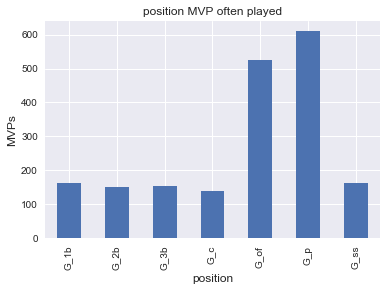

In [198]:
index_array=MVP_count_pos_df.values.argmax(axis=1)
colname=['G_p','G_c','G_1b','G_2b','G_3b','G_ss','G_of','G_lf','G_cf','G_rf']
count={}
for item in index_array:
    if count.has_key(colname[item]):
        count[colname[item]]+=1
    else:
        count[colname[item]]=1

MVP_app_pos_sum_ss=pd.Series(data=count)

%pylab inline
ax=MVP_app_pos_sum_ss.plot.bar(title='position MVP often played')
ax.set_xlabel("position", fontsize=12)
ax.set_ylabel("MVPs", fontsize=12)
plt.show()

  *可以看出所有MVP球员偏向打垒位与投手，外野手，但捕手，中场游击的MVP数却很少，说明捕手,游击手不太容易拿到MVP*
### 2.探索MVP球员的共同特点。
  *在Fielding.csv中找出MVP球员在首次获得年度MVP时的具体表现*

In [199]:
def myfilterWithLg(g):
    global MVP_player_year_df
    pID=g.playerID[g.playerID.first_valid_index()]
    year=MVP_player_year_df.loc[pID,'yearID']
    team=MVP_player_year_df.loc[pID,'lgID']
    boolList=(g['yearID']==year)
    boolList2=(g['lgID']==team)
    tf=boolList & boolList2
    return g[tf]

In [200]:
field_df=pd.read_csv('baseballdatabank-2017.1\core\Fielding.csv')
MVP_field_df=field_df[(field_df.playerID.isin(names))]
MVP_field_bef_df=MVP_field_df.groupby('playerID').apply(myfilterWithLg)
MVP_field_bef_df.head()

playerID  yearID  stint teamID lgID POS    G     GS  \
playerID                                                                 
aaronha01 52150   aaronha01    1955      1    ML1   NL  2B   27   26.0   
          52151   aaronha01    1955      1    ML1   NL  OF  126  125.0   
abernte02 62612   abernte02    1967      1    CIN   NL   P   70    0.0   
abramca01 51456   abramca01    1954      2    BAL   AL  OF  115  110.0   
abreubo01 104782  abreubo01    1999      1    PHI   NL  OF  146  145.0   

                  InnOuts   PO     A    E    DP  PB  WP  SB  CS  ZR  
playerID                                                             
aaronha01 52150     709.0   86  84.0  6.0  23.0 NaN NaN NaN NaN NaN  
          52151    3329.0  254   9.0  9.0   2.0 NaN NaN NaN NaN NaN  
abernte02 62612     319.0    8  25.0  4.0   0.0 NaN NaN NaN NaN NaN  
abramca01 51456    2938.0  248   6.0  6.0   1.0 NaN NaN NaN NaN NaN  
abreubo01 104782   3803.0  262   8.0  3.0   0.0 NaN NaN NaN NaN NaN

  *按球员ID分组，每组分别统计POS	G	GS	InnOuts	PO	A	E	DP	PB	WP	SB*

In [201]:
MVP_field_part_df=MVP_field_bef_df.groupby(level=0).agg({'yearID':'max','G':'sum','GS':'sum','InnOuts':'sum','PO':'sum','A':'sum','E':'sum','DP':'sum','PB':'sum','WP':'sum','SB':'sum'})
MVP_field_part_df.head()

,A,GS,G,yearID,WP,E,DP,PB,InnOuts,SB,PO
playerID,,,,,,,,,,,
aaronha01,93.0,151.0,153,1955,NaN,15.0,25.0,NaN,4038.0,NaN,340
abernte02,25.0,0.0,70,1967,NaN,4.0,0.0,NaN,319.0,NaN,8
abramca01,6.0,110.0,115,1954,NaN,6.0,1.0,NaN,2938.0,NaN,248
abreubo01,8.0,145.0,146,1999,NaN,3.0,0.0,NaN,3803.0,NaN,262
abreujo02,69.0,109.0,109,2014,NaN,6.0,105.0,NaN,2872.0,NaN,970


In [202]:
MVP_field_part_bef_df=MVP_field_part_df.loc[:,['yearID','G','InnOuts','PO','A','DP','E']].sort_values('yearID',axis=0)
MVP_field_part_bef_df.head()

,yearID,G,InnOuts,PO,A,DP,E
playerID,,,,,,,
lajoina01,1911,78,NaN,479,109.0,33.0,14.0
cobbty01,1911,146,NaN,376,24.0,10.0,18.0
lordbr01,1911,132,NaN,271,17.0,5.0,11.0
jacksjo01,1911,147,NaN,242,32.0,8.0,12.0
collied01,1911,132,NaN,348,349.0,49.0,24.0


  **计算每位球员的场均PO A DP E (拿每一行 PO A DP E / G)**  
  **取名为  
  POE(Average Putouts in each match)  
  AE(Average Assists in each match)  
  DPE(Average Double Plays in each match)  
  EE(Average Errors in each match)**

In [203]:
def get_AverageInMatch(field_df):
    MVP_player_field_eve=pd.DataFrame({'yearID':field_df.yearID,
                                       'POE':field_df.PO/field_df.G,
                  'AE':field_df.A/field_df.G,
                  'DPE':field_df.DP/field_df.G,
                  'EE':field_df.E/field_df.G})
    return MVP_player_field_eve
MVP_player_field_ave=get_AverageInMatch(MVP_field_part_bef_df)
MVP_player_field_ave.head()

,AE,DPE,EE,POE,yearID
playerID,,,,,
lajoina01,1.397436,0.423077,0.179487,6.141026,1911
cobbty01,0.164384,0.068493,0.123288,2.575342,1911
lordbr01,0.128788,0.037879,0.083333,2.053030,1911
jacksjo01,0.217687,0.054422,0.081633,1.646259,1911
collied01,2.643939,0.371212,0.181818,2.636364,1911


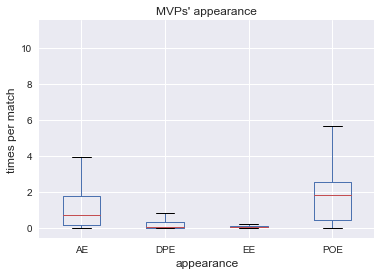

In [204]:
ax=MVP_player_field_ave[['AE','DPE','EE','POE']].plot.box(title="MVPs' appearance")
ax.set_xlabel('appearance',fontsize=12)
ax.set_ylabel('times per match',fontsize=12)
plt.show()

  *可以看出MVP球员的场均击杀及助攻都很高，场均失误都较低*
  *接下来对AE,DPE,EE,POE,yearID计算皮尔逊相关系数，期望找到列之间的相关性实现降维*

In [205]:
MVP_player_field_ave.loc[:,['AE','DPE','EE','POE']].corr()

,AE,DPE,EE,POE
AE,1.000000,0.581391,0.631795,-0.157823
DPE,0.581391,1.000000,0.425884,0.565589
EE,0.631795,0.425884,1.000000,0.095464
POE,-0.157823,0.565589,0.095464,1.000000


  *然而并不能发现AE,DPE,EE,POE之间的相关性*  
### 3.既然如此，以1911年的球员为例，来对比一下MVP外野与非MVP外野球员之间的区别

In [206]:
def get_PlayersAwardInYear(year,award,awards_df):
    '''
    (int,string,DataFrame)->DataFrame
    return the players who gained the 'award'  in the 'year'
    '''
    players_df=awards_df.groupby('awardID').get_group(award)
    year_players_df=players_df[players_df.yearID==year]
    return year_players_df

def get_PlayersNoAwardAppInPosYear(year,award,pos,awards_df,field_df):
    '''
    (int,string,DataFrame,DataFrame)->DataFrame
    return the players'appearance who played at 'pos' appeared in the 'field_df' who did not get the 'award' in the 'year'
    '''
    PlayerAwardedInYear=get_PlayersAwardInYear(year,award,awards_df)
    AwardedPlayerID=PlayerAwardedInYear.playerID.values.tolist()
    AllPlayersInYear=field_df[field_df.yearID==year]
    NotAwarded=AllPlayersInYear[~AllPlayersInYear.playerID.isin(AwardedPlayerID)]
    return NotAwarded[NotAwarded.POS==pos]

def get_PlayersAwardAppInPosYear(year,award,pos,awards_df,field_df):
    '''
    (int,string,DataFrame,DataFrame)->DataFrame
    return the players'appearance appeared in the 'field_df' who got the 'award' in the 'year'
    '''
    PlayerAwardedInYear=get_PlayersAwardInYear(year,award,awards_df)
    AwardedPlayerID=PlayerAwardedInYear.playerID.values.tolist()
    AllPlayersInYear=field_df[field_df.yearID==year]
    Awarded=AllPlayersInYear[AllPlayersInYear.playerID.isin(AwardedPlayerID)]
    return Awarded[Awarded.POS==pos]


In [207]:
MVPs_df_1911OF=get_PlayersAwardAppInPosYear(1911,'MVP','OF',awards_df,field_df)
MVPs_df_1911OF_match=MVPs_df_1911OF[['playerID','yearID','G','PO','A','E','DP']]
MVPs_df_1911OF_ave=get_AverageInMatch(MVPs_df_1911OF_match)
MVPs_df_1911OF_ave.describe()

,AE,DPE,EE,POE,yearID
count,14.000000,14.000000,14.000000,14.000000,14.0
mean,0.146732,0.034168,0.150346,1.813202,1911.0
std,0.061161,0.024891,0.245997,0.418415,0.0
min,0.000000,0.000000,0.034247,1.000000,1911.0
25%,0.124729,0.013592,0.067154,1.602414,1911.0
50%,0.154113,0.034894,0.086538,1.800579,1911.0
75%,0.193075,0.053803,0.109966,2.109411,1911.0
max,0.217687,0.076923,1.000000,2.575342,1911.0


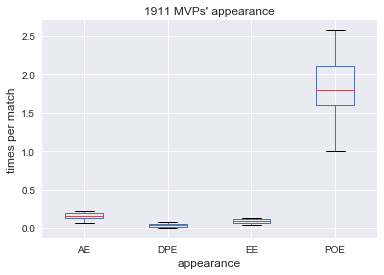

In [208]:
ax=MVPs_df_1911OF_ave[['AE','DPE','EE','POE']].plot.box(title="1911 MVPs' appearance")
ax.set_xlabel('appearance',fontsize=12)
ax.set_ylabel('times per match',fontsize=12)
plt.show()

In [209]:
samplesize=MVPs_df_1911OF.shape

In [210]:
Not_MVPs_df_1911OF=get_PlayersNoAwardAppInPosYear(1911,'MVP','OF',awards_df,field_df)
#样本大小与1911年MVP一样大，随机获取1911非MVP
#Not_MVPs_df_1911OF_sample=Not_MVPs_df_1911OF.sample(samplesize[0])
#Not_MVPs_df_1911OF_match=Not_MVPs_df_1911OF_sample[['playerID','yearID','G','PO','A','E','DP']]
Not_MVPs_df_1911OF_match=Not_MVPs_df_1911OF[['playerID','yearID','G','PO','A','E','DP']]
Not_MVPs_df_1911OF_ave=get_AverageInMatch(Not_MVPs_df_1911OF_match)
Not_MVPs_df_1911OF_ave.describe()

,AE,DPE,EE,POE,yearID
count,135.000000,135.000000,135.000000,135.000000,135.0
mean,0.101190,0.020293,0.099026,1.491144,1911.0
std,0.098394,0.034147,0.123396,0.751792,0.0
min,0.000000,0.000000,0.000000,0.000000,1911.0
25%,0.000000,0.000000,0.000000,1.188181,1911.0
50%,0.102804,0.000000,0.075342,1.590909,1911.0
75%,0.157111,0.033333,0.142857,2.000000,1911.0
max,0.500000,0.250000,1.000000,4.000000,1911.0


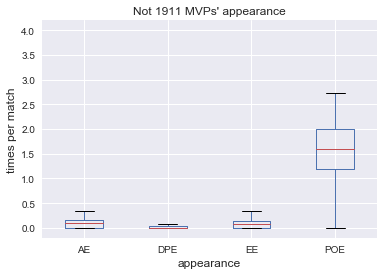

In [211]:
ax=Not_MVPs_df_1911OF_ave[['AE','DPE','EE','POE']].plot.box(title="Not 1911 MVPs' appearance")
ax.set_xlabel('appearance',fontsize=12)
ax.set_ylabel('times per match',fontsize=12)
plt.show()

In [212]:
def CompareData(name1,df1,name2,df2,value):
    '''
    (string,DataFrame,string,DataFrame,string)->None
    dimension:'mean','std','min','25%','50%','75%','max'
    compare 'value' between 'df1','df2' and draw a pic
    '''
    columns=df1.columns
    data1=df1.describe().loc[value,:]
    data2=df2.describe().loc[value,:]
    return pd.DataFrame.from_items([(name1,data1),(name2,data2)])

*mean difference*

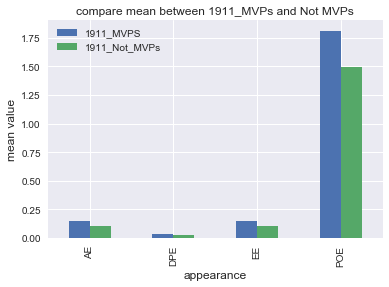

In [213]:
ax=CompareData('1911_MVPS',MVPs_df_1911OF_ave[['AE','DPE','EE','POE']],'1911_Not_MVPs',Not_MVPs_df_1911OF_ave[['AE','DPE','EE','POE']],'mean').plot(kind='bar',title='compare mean between 1911_MVPs and Not MVPs')
ax.set_xlabel('appearance',fontsize=12)
ax.set_ylabel('mean value',fontsize=12)
plt.show()

*std difference*

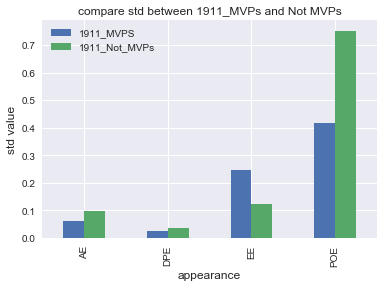

In [214]:
ax=CompareData('1911_MVPS',MVPs_df_1911OF_ave[['AE','DPE','EE','POE']],'1911_Not_MVPs',Not_MVPs_df_1911OF_ave[['AE','DPE','EE','POE']],'std').plot(kind='bar',title='compare std between 1911_MVPs and Not MVPs')
ax.set_xlabel('appearance',fontsize=12)
ax.set_ylabel('std value',fontsize=12)
plt.show()

### 4.接下来我希望从统计学上找到四个属性中能够区别同年的MVP外野和非MVP外野球员的属性  
*实验的自变量是1911年的MVP外野球员，1911年的非外野MVP球员*   
*实验总体为:*  
$S_1$:1911年的MVP外野球员的AE  
$S_2$:1911年的非外野MVP球员AE  
*实验样本为:*  
A：大小为30的1911年所有MVP外野球员的AE
B：大小为30的1911年非MVP外野球员AE
*实验假设为:*  
$H_0$:A的均值$\mu_A$与B的均值$\mu_B$无区别，即$\mu_A$-$\mu_B$=0  
$H_1$:$\mu_A$-$\mu_B$!=0  

In [215]:
def getSample(df,size=1):
    '''
    (DataFrame,string,int)->DataFrame
    return a random sample series selected in 'colname' in df in size 'size'
    '''
    if size<30:
        return df.sample(30,replace=True).reset_index(drop=True)
    else:
        return df.sample(size).reset_index(drop=True)

In [216]:
import math
def cal_Comb_std(s1,s2):
    '''
    (series,series)->long,double
    计算series1,series2的自由度，合并方差
    '''
    MVPs_ss=((s1-s1.mean())**2).sum()
    Not_MVPs_ss=((s2-s2.mean())**2).sum()
    n1=s1.shape[0]
    n2=s2.shape[0]
    df=n1+n2-2
    sp2=(MVPs_ss+Not_MVPs_ss)/(df)
    Comb_std=math.sqrt(sp2/n1+sp2/n2)
    return df,Comb_std

In [217]:
def cal_T(s1,s2):
    '''
    (series,series)->long,double,double
    计算s1和s2的自由度，合并方差，均值差的t值
    '''
    df,Comb_std=cal_Comb_std(s1,s2)
    MVPs_mean=s1.mean()
    Not_MVPs_mean=s2.mean()
    mean_sub=MVPs_mean-Not_MVPs_mean
    t=mean_sub/Comb_std
    return df,Comb_std,t

In [218]:
def get_T(year,award,pos,awards_df,field_df):
    '''
    (int,string,DataFrame,DataFrame)->DataFrame
    返回在指定year获得指定pos的指定award和没获得指定award的球员在场均'Assistance','DoublePlays','Errors','PutOuts'
    上的df,联合SE,t值
    '''
    Not_AwardedApp=get_PlayersNoAwardAppInPosYear(year,award,pos,awards_df,field_df)
    Not_Awarders_df_year_match=Not_AwardedApp[['playerID','yearID','G','PO','A','E','DP']]
    Not_Awarders_df_year_ave=get_AverageInMatch(Not_Awarders_df_year_match)
    
    AwardedApp=get_PlayersAwardAppInPosYear(year,award,pos,awards_df,field_df)
    Awarders_df_year_match=AwardedApp[['playerID','yearID','G','PO','A','E','DP']]
    Awarders_df_year_ave=get_AverageInMatch(Awarders_df_year_match)
    
    dic={}
    Awarders_df_sample=getSample(Awarders_df_year_ave,size=Awarders_df_year_ave.shape[0])
    #mul=Not_Awarders_df_year_ave.shape[0]/Awarders_df_year_ave.shape[0]
    Not_Awarders_df_sample=getSample(Not_Awarders_df_year_ave,size=Awarders_df_year_ave.shape[0])
    
    for col in Awarders_df_year_ave.columns.tolist()[0:-1]:
        Awarders_Col_ss_sample=Awarders_df_sample[col]
        Not_Awarders_Col_ss_sample=Not_Awarders_df_sample[col]
        dic[col]=cal_T(Awarders_Col_ss_sample,Not_Awarders_Col_ss_sample)
    return pd.DataFrame(data=dic,index=['df','Combine_SE','t'])

  *做100次抽样求t值的平均*

In [219]:
df=get_T(1911,'MVP','OF',awards_df,field_df)
for a in range(0,99):
    df+=get_T(1911,'MVP','OF',awards_df,field_df)
df/100

,AE,DPE,EE,POE
df,58.000000,58.000000,58.000000,58.000000
Combine_SE,0.020879,0.007631,0.047240,0.153601
t,2.060865,1.926453,0.829312,1.968891


**可以发现1911年的获得MVP与未获得MVP外野球员在AE,DPE,POE上具有显著差异**

# 4.总结
  在历史上所有MVP球员中，可以看出所有MVP经常打垒位，投手，外野手，但常打捕手，中场游击的MVP数却很少，说明捕手,游击手不太容易拿到MVP。并未发现MVP球员在场均助攻，双杀，错误次数，击杀次数上有什么相关性。  
  我在1911外野MVP与非MVP的对比实验中，各在MVP外野和非MVP外野上选择了大小为至少30的样本(样本t分布近似正态分布)，由df=58可以看出，样本大小其实是30，可以认为样本数量足够大。并且我做了100次取样，然后求t值的平均，避免了样本获取时的偶然性。1911年获得MVP外野与未获得MVP的外野球员在场均助攻，双杀，击杀上有明显区别。但这并不意味着1911年外野MVP的获得与否与AE,DPE,POE上存在因果关系。

# 5.Reference
https://stackoverflow.com/questions/29498652/plot-bar-graph-from-pandas-dataframe  
http://pandas.pydata.org/pandas-docs/stable/api.html  
http://pandas.pydata.org/pandas-docs/stable/10min.html  
http://pandas.pydata.org/pandas-docs/stable/cookbook.html  